In [9]:
import numpy as np
import sympy

Generic ODE one step method

In [45]:
def ODE_onestep(f, x0, T, h, onestep):
  N = int(np.ceil(T/h)) 

  xs = [x0]
  ts = [0]

  for i in range(N-1):
    xs.append(onestep(f, ts[i], xs[i], h))
    ts.append(ts[i] + h)

  ts.append(T)
  h_last = ts[-1] - ts[-2]
  xs.append(xs[-2] + h_last*f(ts[-2], xs[-2]))
  
  return ts, xs

Forward Euler Method

In [46]:
def forward_euler(f, x0, T, h):
  def forward_euler_onestep(f, ti, xi, h):
    return xi + h*f(ti, xi)

  return ODE_onestep(f, x0, T, h, forward_euler_onestep)

def forward_euler_h(M, T, eps):
  # TODO

In [ ]:
def runge_kutta_4(f, x0, T, h):
  def rk4_onestep(f, ti, xi, h):
    # TODO

def runge_kutta_4_h(M, T, eps):
  # TODO

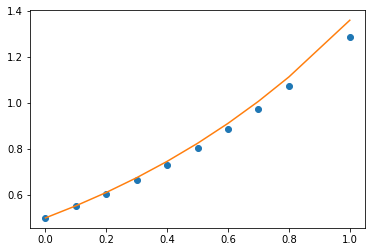

In [34]:
import matplotlib.pyplot as plt

plt.plot(ts, xs, 'o')
plt.plot(ts, 0.5*np.exp(ts))

In [47]:
_x0 = sympy.symbols("_x0")
ts, xs = forward_euler(lambda *input: input[1], _x0, 2, 0.1)
_t = sympy.symbols("_t")
f_approx = sympy.interpolating_spline(1, _t, ts, xs)


In [52]:
f_approx_fn = sympy.lambdify([_x0, _t], f_approx)
print(f_approx)
print(f_approx_fn)

Piecewise((11.0*_t*_x0 + 1.0*_x0*(1.0 - 10.0*_t), (_t >= 0) & (_t <= 0.1)), (1.1*_x0*(2.0 - 10.0*_t) + 1.21*_x0*(10.0*_t - 1.0), (_t >= 0.1) & (_t <= 0.2)), (1.21*_x0*(3.0 - 10.0*_t) + 1.331*_x0*(10.0*_t - 2.0), (_t >= 0.2) & (_t <= 0.3)), (1.331*_x0*(4.0 - 10.0*_t) + 1.4641*_x0*(10.0*_t - 3.0), (_t >= 0.3) & (_t <= 0.4)), (1.4641*_x0*(5.0 - 10.0*_t) + 1.61051*_x0*(10.0*_t - 4.0), (_t >= 0.4) & (_t <= 0.5)), (1.61051*_x0*(6.0 - 10.0*_t) + 1.771561*_x0*(10.0*_t - 5.0), (_t >= 0.5) & (_t <= 0.6)), (1.771561*_x0*(7.0 - 10.0*_t) + 1.9487171*_x0*(10.0*_t - 6.0), (_t >= 0.6) & (_t <= 0.7)), (1.9487171*_x0*(8.0 - 10.0*_t) + 2.14358881*_x0*(10.0*_t - 7.0), (_t >= 0.7) & (_t <= 0.8)), (2.14358881*_x0*(9.0 - 10.0*_t) + 2.357947691*_x0*(10.0*_t - 8.0), (_t >= 0.8) & (_t <= 0.9)), (2.357947691*_x0*(10.0 - 10.0*_t) + 2.5937424601*_x0*(10.0*_t - 9.0), (_t >= 0.9) & (_t <= 1.0)), (2.5937424601*_x0*(11.0 - 10.0*_t) + 2.85311670611*_x0*(10.0*_t - 10.0), (_t >= 1.0) & (_t <= 1.1)), (2.85311670611*_x0*(1

In [66]:
x0 = np.array([0.9, 0.3])
t = 0.2
print(x0*np.exp(t))
print(f_approx_fn(x0, t))

[1.09926248 0.36642083]
[1.089 0.363]


Discretely approximates x' = f(x) and then uses spline approximation to create continuous approximation of the solution.




In [61]:
def approximation(f, T, eps=1e-5, num_method=forward_euler, spline_deg=1):
  """ 
    symbolic function approximation to solution of
    x'(t) = f(t, x) for 0 <= t <= T

    inputs
    f: RHS function of diff eq
    T: maximum time
    eps: global error
    num_method: numerical method used for calculating discrete ODE approximation 
    approx_method: method used for converting discrete approximation to continuous approximation

    output
    x_approx(x0, t): function which approximates solution to x'(t) = f(t, x) within eps
  """
  M = 1
  h = 0.1 # calculate_h(M, T, eps, num_method)
  _x0 = sympy.symbols("_x0")
  ts, xs = num_method(f, _x0, T, h)

  _t = sympy.symbols("_t")
  f_approx = sympy.interpolating_spline(spline_deg, _t, ts, xs)

  return sympy.lambdify([_x0, _t], f_approx)


In [63]:
def f(t, x):
  return x
f_approx_fn = approximation(f, 1)

In [65]:
x0 = 0.9
t = 0.5
print(x0*np.exp(t))
print(f_approx_fn(x0, t))

1.4838491436301153
1.449459


In [4]:
class SyntaxError():
  def __init__(self, s: str, column: int):
      self.s = s
      self.column = column 

  def __str__(self) -> str:
      return self.__name__+ " at character " + self.column + " in " + self.s

class MissingBracket(SyntaxError):
    pass


In [68]:
def ODE_parser(ODE):
  """
  { t' = 1, x' = f(t, x), y' = g(t, x, y) & t < T}
  """
  ODE = ODE.replace(" ", "")
  if ODE[0] != "{":
    raise MissingBracket(ODE, 0)
  if ODE[-1] != "}":
    raise MissingBracket(ODE, len(ODE)-1)
  
  if "&" not in ODE
  a = ODE.index("&")
  if indexOf()
  
  f_str = ODE[ODE.find("{"), ODE.]
  f_str
  f_expr = sympy.sympify(f_str)
  f = sympy.lambdify([sympy.symbols("t"), sympy.symbols("x")], expr)

ODE_parser("")

NameError: ignored

In [59]:
str_expr = "x**2 + t + 3*x - 1/2"
expr = sympy.sympify(str_expr)
f = sympy.lambdify([sympy.symbols("t"), sympy.symbols("x")], expr)
print(f(1, 2))

10.5
